This is a note book for EDA and save the file into different folders

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from duke_dbt_data import dcmread_image

In [2]:
# load the path file
df = pd.read_csv("data/file-paths-train.csv")

In [3]:
df.head(2)

PatientID    StudyUID  View  \
0  DBT-P00013  DBT-S00163  rmlo   
1  DBT-P00023  DBT-S04378   lcc   

                                    descriptive_path  \
0  Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...   
1  Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...   

                                        classic_path  
0  Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...  
1  Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...

In [7]:
# adding ID to search and use the picture name later
df['ID'] = df['PatientID']+df['StudyUID']+df['View'] #unique ID
print((df['ID'].nunique)) # 2596
df.head(2)

<bound method IndexOpsMixin.nunique of 0       DBT-P00013DBT-S00163rmlo
1        DBT-P00023DBT-S04378lcc
2       DBT-P00023DBT-S04378lmlo
3        DBT-P00023DBT-S04378rcc
4       DBT-P00023DBT-S04378rmlo
                  ...           
2591    DBT-P05053DBT-S01068lmlo
2592     DBT-P05053DBT-S01068rcc
2593    DBT-P05053DBT-S01068rmlo
2594     DBT-P05056DBT-S01839rcc
2595    DBT-P05056DBT-S01839rmlo
Name: ID, Length: 2596, dtype: object>


PatientID    StudyUID  View  \
0  DBT-P00013  DBT-S00163  rmlo   
1  DBT-P00023  DBT-S04378   lcc   

                                    descriptive_path  \
0  Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...   
1  Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...   

                                        classic_path                        ID  
0  Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...  DBT-P00013DBT-S00163rmlo  
1  Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...   DBT-P00023DBT-S04378lcc

In [8]:
df_label = pd.read_csv("data/labels-train.csv")
df_label.head(2)
# there are 4 diff categories. Normal	Actionable	Benign	Cancer	

PatientID    StudyUID  View  Normal  Actionable  Benign  Cancer  \
0  DBT-P00013  DBT-S00163  rmlo       0           0       1       0   
1  DBT-P00023  DBT-S04378   lcc       0           1       0       0   

                         ID  
0  DBT-P00013DBT-S00163rmlo  
1   DBT-P00023DBT-S04378lcc

In [9]:
#merge the table
df_merge = df.merge(df_label, on ='ID', how='left')
df_clean = df_merge.loc[:,['descriptive_path', 'ID','Normal','Actionable','Benign','Cancer','View_x']]

df_clean.head(2)


descriptive_path  \
0  Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...   
1  Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...   

                         ID  Normal  Actionable  Benign  Cancer View_x  
0  DBT-P00013DBT-S00163rmlo       0           0       1       0   rmlo  
1   DBT-P00023DBT-S04378lcc       0           1       0       0    lcc

Normal        1680
Actionable     716
Benign         124
Cancer          76
dtype: int64

<BarContainer object of 4 artists>

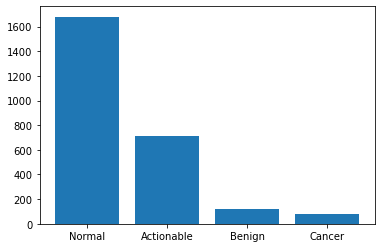

In [34]:
category = df_clean.loc[:,['Normal','Actionable','Benign','Cancer']]
display(category.sum())


plt.bar(category.sum().index, category.sum().values)

In [35]:
len(df_clean)

2596

In [36]:
#image check for image i =0
view_series = df_clean.iloc[0]
view = view_series["View_x"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join("data", view_series["descriptive_path"])
image_path

'data\\Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2000-DBT-S00163-MAMMO DIAGNOSTIC DIGITAL BILATERAL-56865/20566.000000-32081/1-1.dcm'

In [37]:
image = dcmread_image(fp=image_path, view=view)
image.shape
# not sure why it has 49 images(looks identical)

C:\Users\galma\anaconda3\envs\tflow\lib\site-packages\openjpeg\utils.py:189: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


(49, 2457, 1890)

In [38]:
image[0].shape

(2457, 1890)

In [44]:
image.shape[0]
image[0].shape

(2457, 1890)

In [52]:
image[0]

array([[    0,     0,     0, ..., 23039, 25343, 26495],
       [    0,     0,     0, ..., 20351, 23807, 25983],
       [    0,     0,     0, ..., 22655, 24319, 23295],
       ...,
       [    0,     0,     0, ..., 17407, 17919, 18047],
       [    0,     0,     0, ..., 17151, 17151, 17151],
       [    0,     0,     0, ..., 16383, 16767, 16767]], dtype=uint16)

In [50]:
shapes = [ image[i].shape for i in range(image.shape[0])]
len(shapes)
# all same shape

49

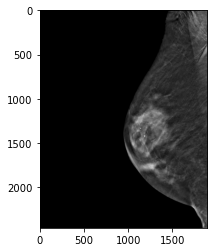

In [49]:
plt.imshow(image[0], cmap=plt.cm.gray);

In [61]:
#save the image as jpg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
img_array = image[0]

# reshape the array
img_arary_r = img_array.reshape((img_array.shape[0], img_array.shape[1],1))

# save the image with a new filename
save_img('image0.jpg', img_arary_r)

# load the image to confirm it was saved correctly
pic = load_img('image0.jpg')
print(pic.size) # same size 

# check the image array
img_arary_r_1 = img_to_array(pic)

print(f'MIN of image[0], before:{image[0].min()}')
print(f'MAX of image[0], before:{image[0].max()}')
print(f'MIN of img_arary_r_1, after:{img_arary_r_1.min()}')
print(f'MAX of img_arary_r_1, after:{img_arary_r_1.max()}')
# image size changed

(1890, 2457)
MIN of image[0], before:0
MAX of image[0], before:65535
MIN of img_arary_r_1, after:0.0
MAX of img_arary_r_1, after:255.0


Wall time: 0 ns


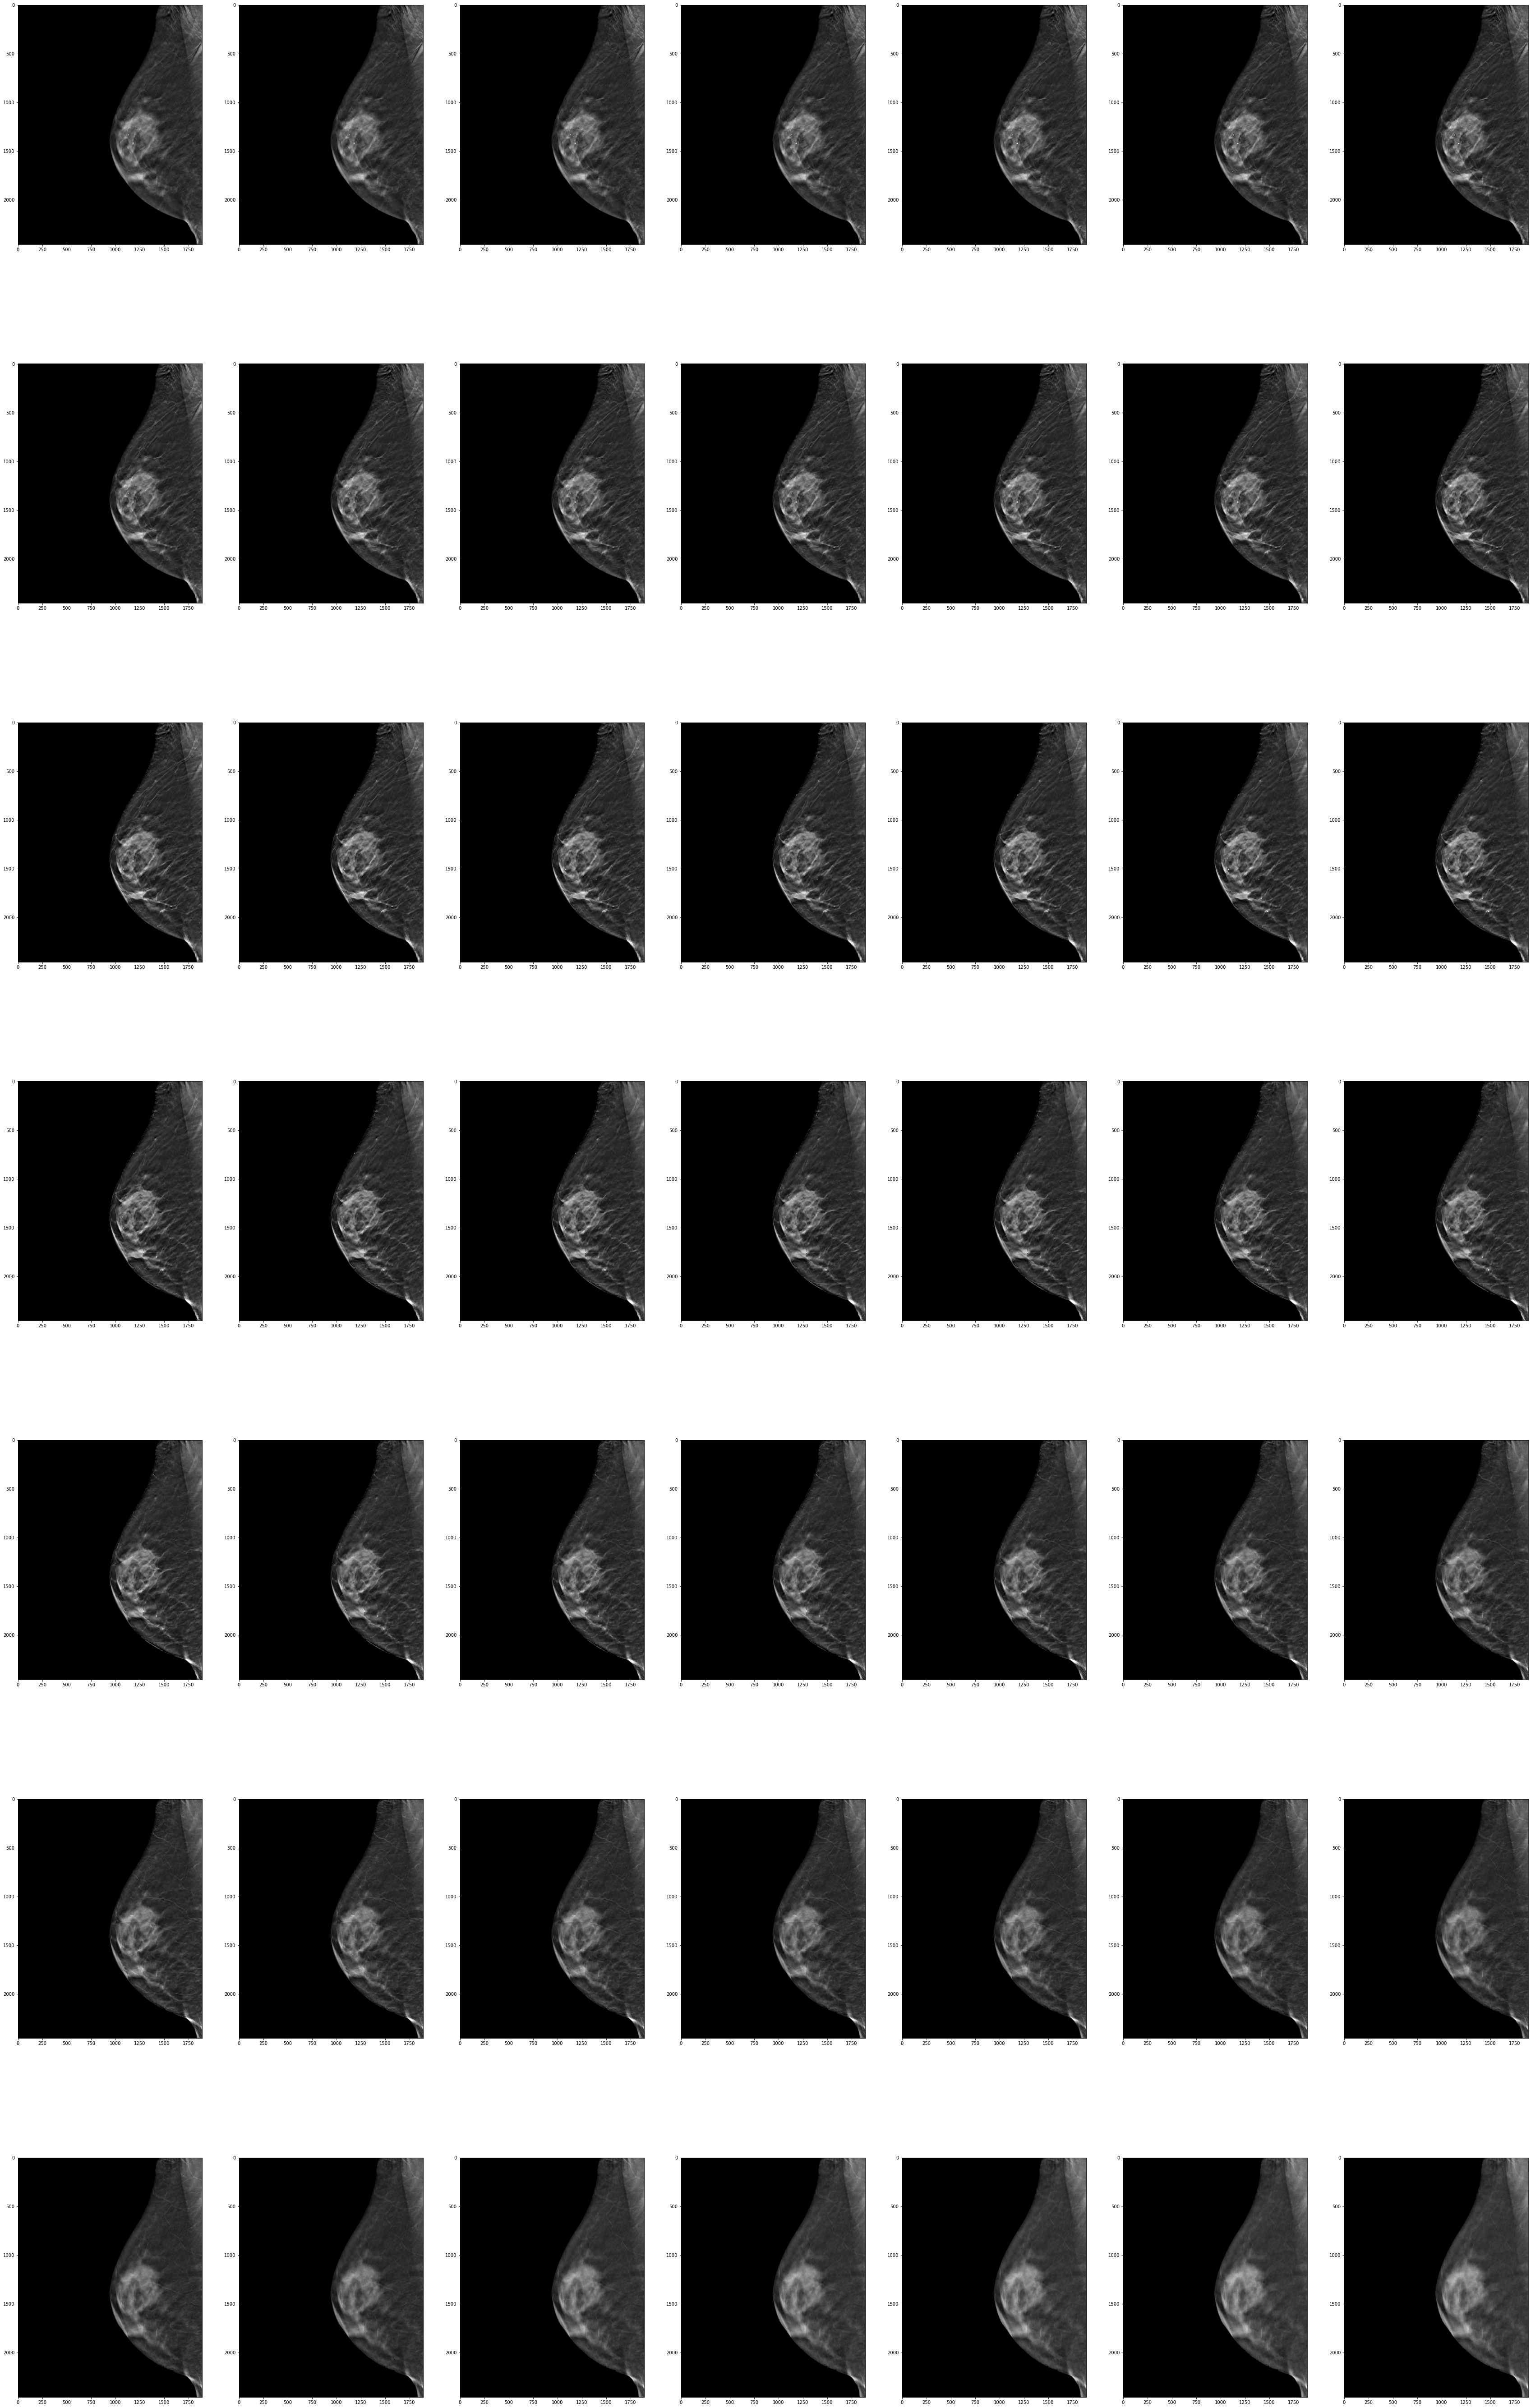

In [64]:
# all of 49 images from first dicom file

%time
2ds
for i in range(image.shape[0]):
   
    plt.subplot(7,7,1+i)
    plt.imshow(image[i], cmap=plt.cm.gray);

In [65]:
# lets see the second dicom file: very slightly different
view_series = df_clean.iloc[1]
view = view_series["View_x"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join("data", view_series["descriptive_path"])
image = dcmread_image(fp=image_path, view=view)
image.shape

C:\Users\galma\anaconda3\envs\tflow\lib\site-packages\openjpeg\utils.py:189: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


(63, 2457, 1996)

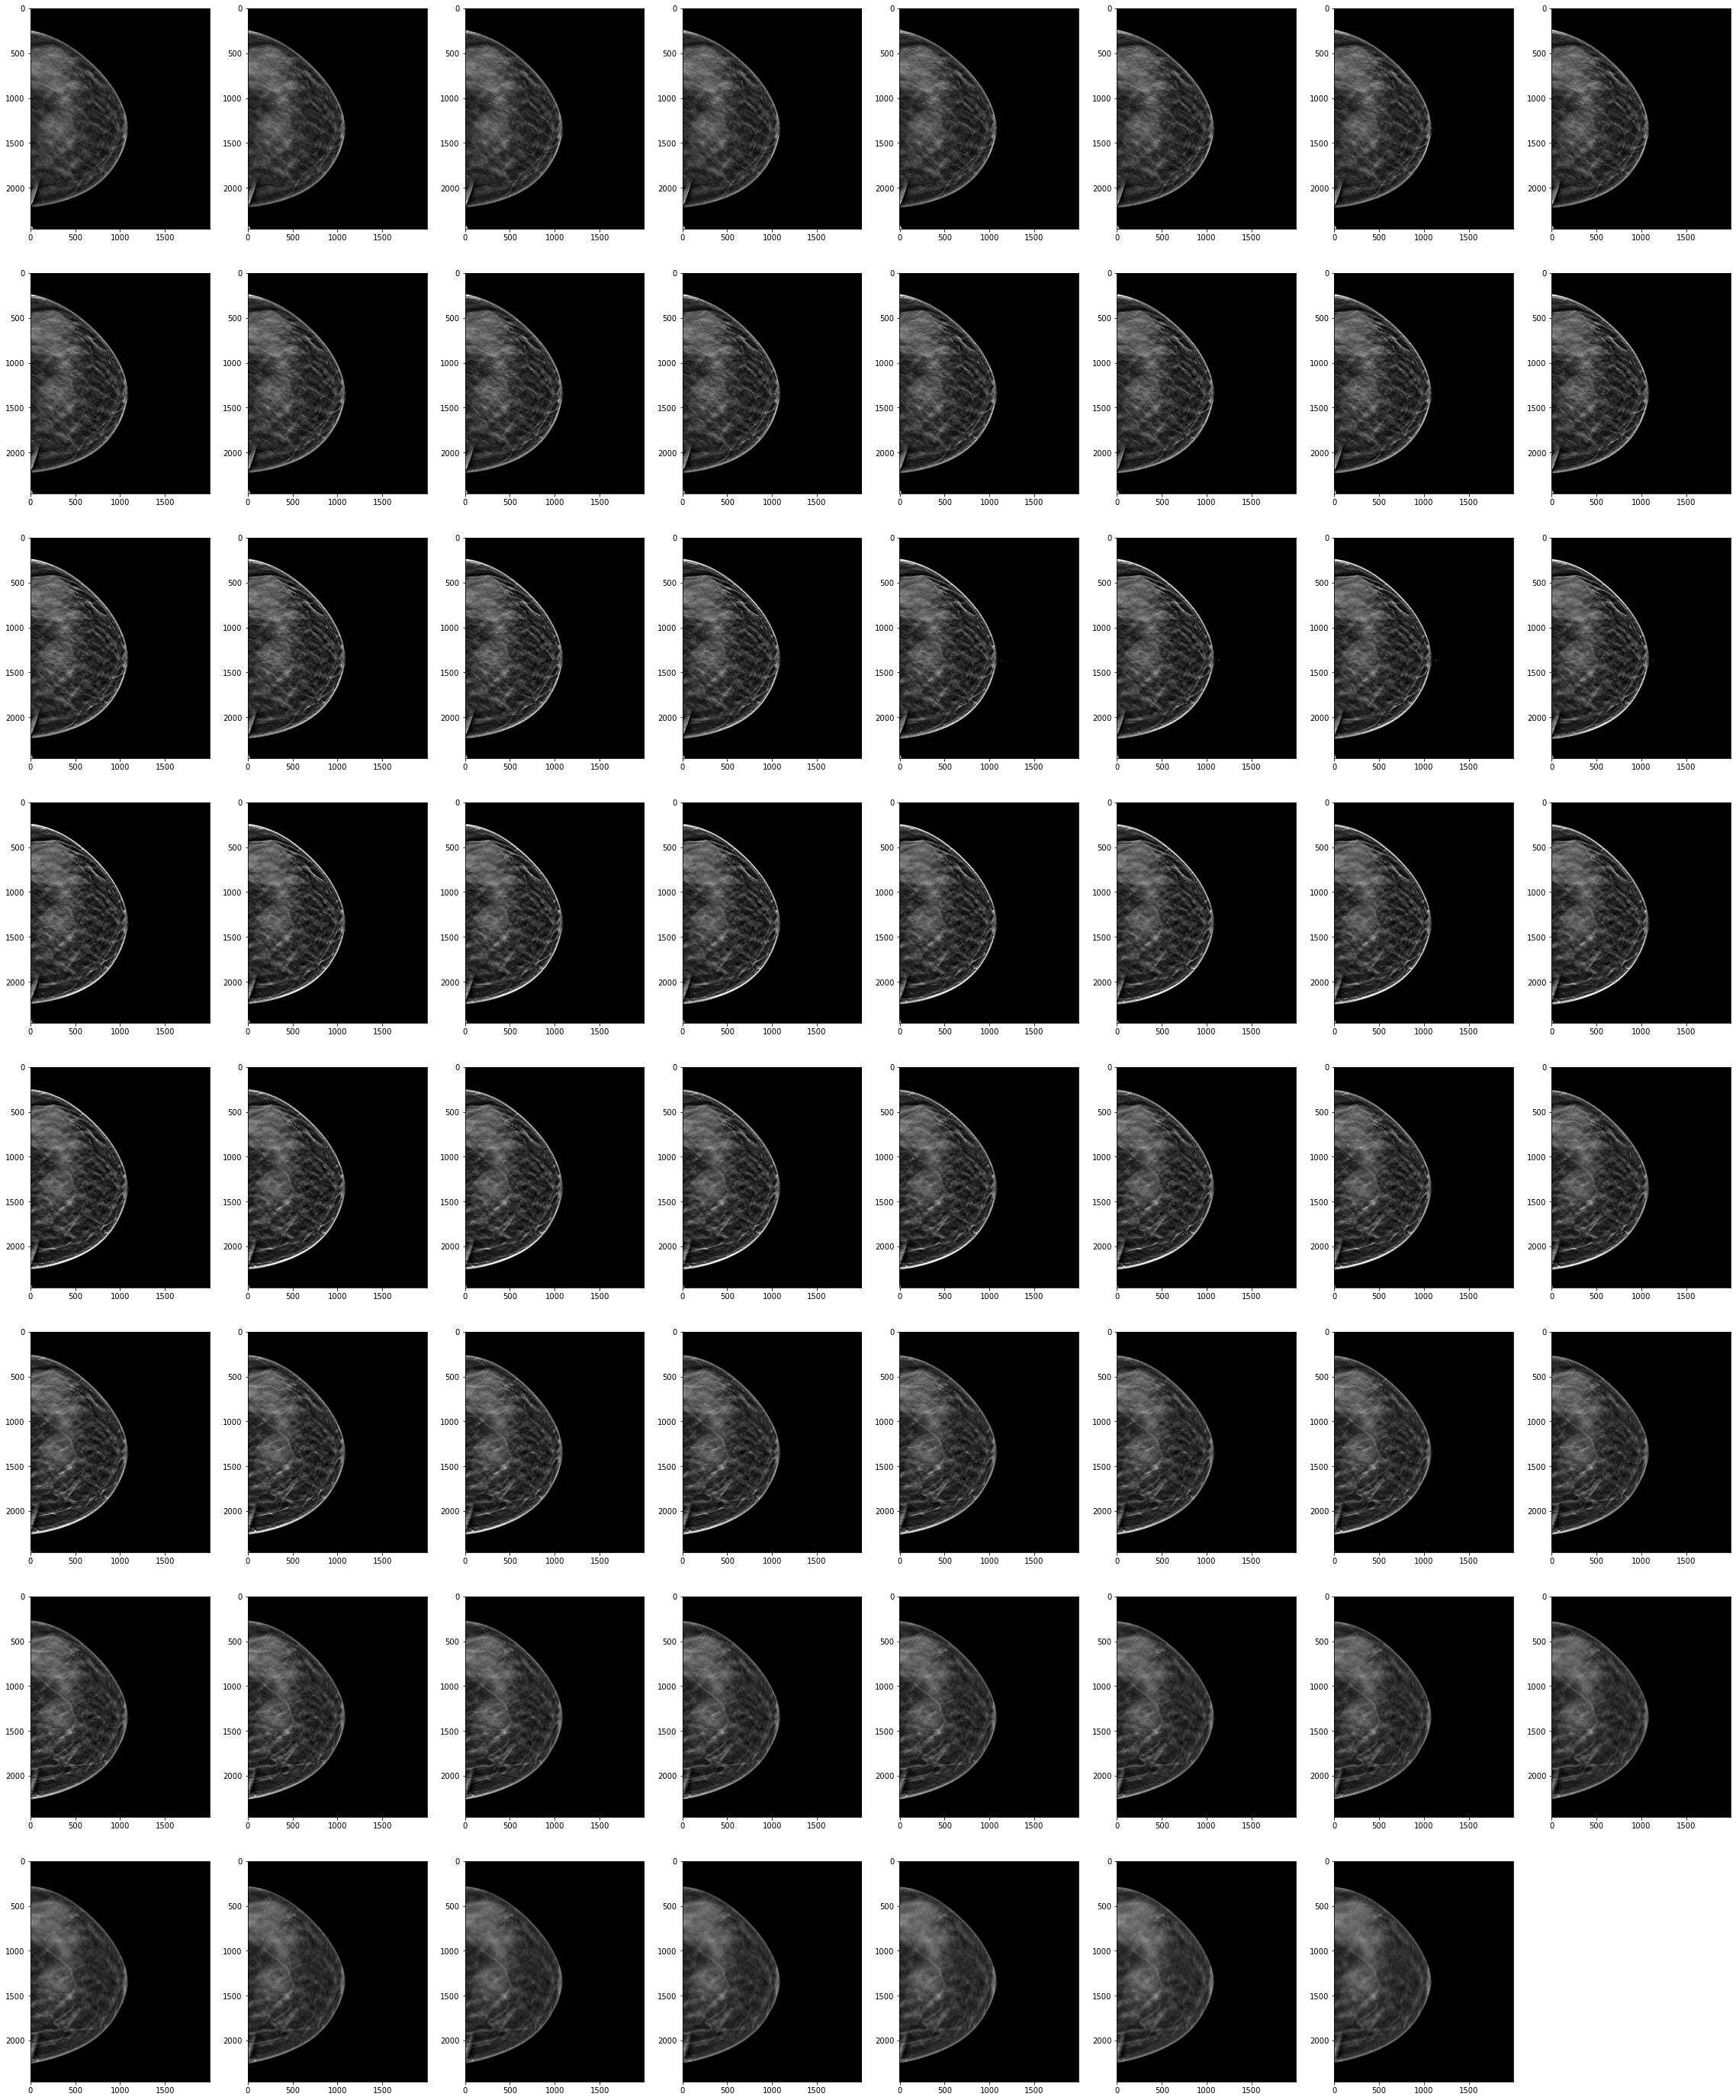

In [66]:
plt.figure(figsize=(40,50))
for i in range(image.shape[0]):
    plt.subplot(8,8,1+i)
    plt.imshow(image[i], cmap=plt.cm.gray);

In [ ]:
# test for saving 10 pictures into the train table.

In [ ]:
plt.figure(figsize=(40,50))
for i in range(9):
    view_series = df_clean.iloc[i]
    image_path = os.path.join("data", view_series["descriptive_path"])
    cancer = os.path.join("data",view_series[] )
    image = dcmread_image(fp=image_path, view=view)
    plt.subplot(3, 3, 1+i)
    plt.imshow(image[i], cmap=plt.cm.gray);

In [ ]:
print(f'MIN:{image[0].min()}')
print(f'MAX:{image[0].max()}')

In [71]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
img_array = image[0]

img_arary_r = img_array.reshape((img_array.shape[0], img_array.shape[1],1))

# save the image with a new filename
path = 'data/train/cancer'
save_img(os.path.join(path,'cancer_'+str(0)+'.jpg' ),img_arary_r)
# save_img('image0.jpg', img_arary_r)
# load the image to confirm it was saved correctly

In [67]:
from keras.preprocessing.image import load_img
pic = load_img('image0.jpg')
pic.size

(1890, 2457)

In [69]:
save_img('check/image0.jpg', img_arary_r)